In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from petitRADTRANS import Radtrans
from petitRADTRANS.retrieval import Retrieval, RetrievalConfig
from petitRADTRANS.retrieval.models import *
import petitRADTRANS.retrieval.plot_style as ps
from petitRADTRANS.retrieval.parameter import Parameter
import petitRADTRANS.retrieval.cloud_cond as cc

from petitRADTRANS.retrieval.util import *
from petitRADTRANS.retrieval.chemistry import get_abundances

from glob import glob
import scicomap as sc
import matplotlib
matplotlib.rcParams['axes.linewidth'] = 2
import json
from molmass import Formula
version = "v03"
map_538 = sc.ScicoQualitative(cmap='538')
fixed_cmap_538 = map_538.get_mpl_color_map()
colour_dict = {"b":fixed_cmap_538(3/6),
              "c":fixed_cmap_538(2/6),
              "d":fixed_cmap_538(1/6),
              "e":fixed_cmap_538(0/6)}


model_function_dictionary = {}
model_function_dictionary["emission_model_diseq"] = emission_model_diseq
model_function_dictionary["emission_model_diseq_simple_patchy_clouds"] = emission_model_diseq_simple_patchy_clouds
model_function_dictionary["interpolated_profile_emission"] = interpolated_profile_emission
model_function_dictionary["guillot_emission"] = guillot_emission
model_function_dictionary["gradient_profile_emission"] = gradient_profile_emission
model_function_dictionary["guillot_patchy_emission"] = guillot_patchy_emission
model_function_dictionary["gradient_constrained"] = gradient_constrained

import pandas as pd
import copy as cp


Using pRT Plotting style!


In [2]:
retrievals_full = ["HR8799b_23_v02_diseq_all_scaleos_freeFeMgCloud_mrprior_newdata_newphot",
                   "HR8799c_23_v01_diseq_all_grav_eqFeMgamPatchyCloud_mr_fseds_newbins_newphot",
                   "HR8799d_23_v02_diseq_all_eqFeMgCloud_fseds_newconv_newphot_newSPHGPI_patchy",
                   "HR8799e_23_v02_diseq_all_eqFeMgCloud_newphot_newSPHGPI_mrprior_grad_fseds",
                   ]
retrievals_free = ["HR8799b_23_v04_free_all_correctos_freeConstMassFeMgCloud_grad_newphotv2_mrprior",
                   "HR8799c_23_v04_free_grav_noos_freeFeMgCloud_grad_newphot_newGPI_fseds_mr",
                   "HR8799d_23_v05_free_all_freeMgFeCloud_guillot_scaleALES_newSPHGPI_FeH",
                   "HR8799e_23_v02_free_all_freeFeMgCloud_grad_fseds_newphot_newconv_newSPHGPI",
                   ]
bulk_parameters = {}
bulk_parameters["HR8799b_23_v02_diseq_all_scaleos_freeFeMgCloud_mrprior_newdata_newphot"] = {"index":"b.", "M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799c_23_v01_diseq_all_grav_eqFeMgamPatchyCloud_mr_fseds_newbins_newphot"] = {"index":"c.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799d_23_v02_diseq_all_eqFeMgCloud_fseds_newconv_newphot_newSPHGPI_patchy"] = {"index":"d.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799e_23_v02_diseq_all_eqFeMgCloud_newphot_newSPHGPI_mrprior_grad_fseds"] = {"index":"e.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799b_23_v04_free_all_correctos_freeConstMassFeMgCloud_grad_newphotv2_mrprior"] = {"index":"b.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799c_23_v04_free_grav_noos_freeFeMgCloud_grad_newphot_newGPI_fseds_mr"] = {"index":"c.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799d_23_v05_free_all_freeMgFeCloud_guillot_scaleALES_newSPHGPI_FeH"] = {"index":"d.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}
bulk_parameters["HR8799e_23_v02_free_all_freeFeMgCloud_grad_fseds_newphot_newconv_newSPHGPI"] = {"index":"e.","M/H":r"$0.5\pm0.1$","C/O":r"$0.5\pm0.1$"}


free_dirs =["b_free/", "c_free/", "d_free/", "e_free/"]
full_dirs =["b_full/", "c_full/", "d_full/", "e_full/"]

ret_dir = "/Users/nasedkin/Documents/RetrievalResults/HR8799_2023_Retrievals/"
data_dir = "retrieval_output_arrays/"
bname = "_abundance_profiles.npz"

In [3]:
full_samples = {}
params = {}
for i,ret in enumerate(retrievals_full):
    with open(f"{ret_dir}{full_dirs[i]}out_PMN/{ret}_params.json", 'r') as f:
        params[ret] = json.load(f)
    full_samples[ret] = pd.read_csv(f"{ret_dir}{full_dirs[i]}out_PMN/{ret}_post_equal_weights.dat", 
                                    delim_whitespace=True,
                                    index_col=False,
                                    names =params[ret])
free_samples = {}
for i,ret in enumerate(retrievals_free):
    with open(f"{ret_dir}{free_dirs[i]}out_PMN/{ret}_params.json", 'r') as f:
        params[ret] = json.load(f)
    free_samples[ret] = pd.read_csv(f"{ret_dir}{free_dirs[i]}out_PMN/{ret}_post_equal_weights.dat", 
                                    delim_whitespace=True,
                                    index_col=False,
                                    names =params[ret])

    

/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_35219/3250295874.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  full_samples[ret] = pd.read_csv(f"{ret_dir}{full_dirs[i]}out_PMN/{ret}_post_equal_weights.dat",
/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_35219/3250295874.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  full_samples[ret] = pd.read_csv(f"{ret_dir}{full_dirs[i]}out_PMN/{ret}_post_equal_weights.dat",
/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_35219/3250295874.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  full_samples[ret] = pd.read_csv(f"{ret_dir}{full_dirs[i]}out_PMN/{ret}_post_equal_weights.dat",
/var/folders/zb/1kks1nb14h7_f6zq97b6sg8xxc6_b4/T/ipykernel_35219/3250295874.py:6: ParserWar

In [4]:

def read_parameter_dict(dir, ret, sumfile):
    data_start = False
    free_param_start = False
    fixed_param_start = False

    free_param_list = []
    fixed_param_dict = {}
    current_name = None
    with open(f"{dir}out_PMN/{ret}_params.json", 'r') as f:
        free_param_list = json.load(f)
    for i,line in enumerate(sumfile):
        if line.strip() == "":
            continue
        if line.strip() == "Data":
            data_start = True
            free_param_start = False
            fixed_param_start = False
            continue
        if "Multinest Outputs" in line:
            data_start = False
            continue
        if "Best Fit" in line:
            data_start = False
        if "Free Parameters" in line:
            free_param_start = True
            fixed_param_start = False
            continue
        if "Fixed Parameters" in line:
            fixed_param_start = True
            continue

        if free_param_start:
            continue

        if fixed_param_start:
            param, val = line.split("=")
            param = param.strip()
            if param == "nnodes":
                fixed_param_dict[param] = int(float(val.replace('\n',"").strip()))
                continue
            if param == "num_layer":
                fixed_param_dict[param] = int(float(val.replace('\n',"").strip()))
                continue
            if param == "N_layers":
                fixed_param_dict[param] = int(float(val.replace('\n',"").strip()))
                continue
            fixed_param_dict[param] = float(val.replace('\n',"").strip())
            continue
    param_out = {}
    for key,val in fixed_param_dict.items():
        param_out[key] = Parameter(key,False,value = val)
    for name in free_param_list:
        param_out[name] = Parameter(name,False,value = None)
    return param_out
    
def get_abundances_and_pbases(pRT_Object, samples, model_generating_function, params, name = ""):
    abundance_profiles = {} #Full mass fraction vertical profiles (nsample, nspecies, npressure)
   
    pressures = pRT_Object.press/1e6
    for line in pRT_Object.line_species:
        abundance_profiles[line] = []
    for ind,row in samples.iterrows():
        for key in params.keys():
            if key in samples.columns:
                params[key] = Parameter(key,False,value=row[key])
        pressure, temperatures = model_generating_function(pRT_Object,
                                                    params,
                                                    AMR = False,
                                                    PT_plot_mode = True)                                         
        abundances, MMW, small_index, Pbases = get_abundances(pressure,
                                                            temperatures,
                                                            pRT_Object.line_species,
                                                            pRT_Object.cloud_species,
                                                            params,
                                                            AMR =False)
        for key,val in abundances.items():
            if not key in abundance_profiles.keys():
                abundance_profiles[key] = []
            abundance_profiles[key].append(val)
    for key, val in abundance_profiles.items():
        abundance_profiles[key] = np.array(val)
    return abundance_profiles

In [5]:
resolution = 40
line_species = ['H2O_Exomol', 
                'CO_all_iso_HITEMP', 
                'CH4', 
                'CO2', 
                'NH3', 
                'HCN',
                'H2S', 
                'FeH',
                'PH3', 
                'Na_allard', 
                'K_allard', 
                'TiO_all_Exomol', 
                'VO',
                'SiO']
continuum_opacities = ['H2-H2', 'H2-He']  
rayleigh_species = ['H2', 'He']  

count = 0
full_abunds = {}
for key, sample in full_samples.items():
    species = []
    for spec in line_species:
        species.append(spec + "_R_" + str(resolution))

    summary_filename = f"{ret_dir}{full_dirs[count]}/evaluate_{key}/{key}_ret_summary.txt" 
    if not os.path.exists(summary_filename):continue
    sumfile = list(open(summary_filename))
    sample.log10_baysian_evidence = -np.inf
    sample.chi2_DoF = -np.inf
    if os.path.exists(summary_filename):
        for s in sumfile:
            if "Model Function" in s:
                model_generating_function = model_function_dictionary[s.split("=")[-1].strip()]
                break
        parameters_base = read_parameter_dict(f"{ret_dir}{full_dirs[count]}",key,sumfile)  
        cloud_species = []
        for pname in list(sample.columns):
            if "(c)" in pname:
                cname = pname.split('_')[-1] + "_cd"
                if not cname in cloud_species:
                    cloud_species.append(cname)
                    
        pressures = np.logspace(-6,3,80)
        prt_object = Radtrans(line_species=cp.copy(species),
                                rayleigh_species=cp.copy(rayleigh_species),
                                continuum_opacities=cp.copy(continuum_opacities),
                                cloud_species=cp.copy(cloud_species),
                                mode='c-k',
                                wlen_bords_micron=[0.8, 2],
                                do_scat_emis=True)
        prt_object.setup_opa_structure(pressures)
        #sample_teff(prt_object, sample, model_generating_function, parameters_base, distance = 10.0*nc.pc, name = name)
        full_abunds[key] = get_abundances_and_pbases(prt_object, sample, model_generating_function, parameters_base, name = key)
        count +=1

/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/radtrans.py:119: FutureWarning: pRT_input_data_path was set by an environment variable. In a future update, the path to the petitRADTRANS input_data will be set within a .ini file that will be automatically generated into the user home directory (OS agnostic), inside a .petitradtrans directory
  warnings.warn(f"pRT_input_data_path was set by an environment variable. In a future update, the path to "


Emission scattering is enabled: enforcing test_ck_shuffle_comp = True
  Read line opacities of H2O_Exomol_R_40...
 Done.
  Read line opacities of CO_all_iso_HITEMP_R_40...
 Done.
  Read line opacities of CH4_R_40...
 Done.
  Read line opacities of CO2_R_40...
 Done.
  Read line opacities of NH3_R_40...
 Done.
  Read line opacities of HCN_R_40...
 Done.
  Read line opacities of H2S_R_40...
 Done.
  Read line opacities of FeH_R_40...
 Done.
  Read line opacities of PH3_R_40...
 Done.
  Read line opacities of Na_allard_R_40...
 Done.
  Read line opacities of K_allard_R_40...
 Done.
  Read line opacities of TiO_all_Exomol_R_40...
 Done.
  Read line opacities of VO_R_40...
 Done.
  Read line opacities of SiO_R_40...
 Done.

  Read in opacity of cloud species Fe ...
  Read in opacity of cloud species MgSiO3 ...
  Read CIA opacities for H2-H2...
  Read CIA opacities for H2-He...
Done.

Emission scattering is enabled: enforcing test_ck_shuffle_comp = True
  Read line opacities of H2O_Exomol_R_

In [6]:
free_samples[retrievals_free[0]]

,mass,R_pl,T_bottom,PTslope_1,PTslope_2,PTslope_3,PTslope_4,PTslope_5,PTslope_6,log_kzz,...,CO_all_iso_HITEMP,CH4,CO2,HCN,H2S,NH3,log_X_cb_Fe(c),log_Pbase_Fe(c),log_X_cb_MgSiO3(c),log_Pbase_MgSiO3(c)
0,1.245242e+31,5.676773e+09,7597.808709,0.263091,0.249243,0.260003,0.288996,0.127457,0.002765,6.157439,...,-1.233512,-5.253209,-4.015696,-3.777015,-3.064520,-5.460560,-2.298713,0.408882,-2.095083,-1.498638
1,1.094437e+31,5.870191e+09,7423.268993,0.235924,0.245519,0.284672,0.287985,0.119749,-0.021022,5.919448,...,-1.678655,-5.278045,-4.508802,-3.371922,-4.540409,-5.857185,-2.874766,0.316247,-2.071906,-1.457838
2,1.252288e+31,6.126361e+09,7209.491946,0.254175,0.252884,0.249310,0.280539,0.164722,-0.071164,5.541700,...,-1.390720,-5.300916,-4.093839,-3.418574,-5.625647,-5.245903,-2.216419,0.478235,-2.040269,-1.216217
3,1.178601e+31,5.606119e+09,8002.347998,0.292895,0.251794,0.290159,0.252307,0.153355,-0.091922,6.321839,...,-1.406197,-4.781919,-3.467946,-3.160636,-3.800312,-5.138549,-2.349189,0.512136,-2.091334,-1.527257
4,9.834661e+30,6.018582e+09,7276.339269,0.295618,0.238166,0.251566,0.261286,0.163421,-0.032082,5.843395,...,-1.493067,-5.250202,-3.872529,-3.735289,-3.243198,-5.962359,-3.152319,0.341354,-2.027804,-1.556224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52143,1.099729e+31,5.355238e+09,7846.251350,0.244240,0.247247,0.275573,0.372147,0.104304,-0.267306,5.911986,...,-1.494686,-4.911502,-5.501774,-3.420625,-4.251990,-5.886974,-2.181648,0.386206,-2.132310,-1.416879
52144,1.035593e+31,5.528251e+09,7848.866240,0.269656,0.262999,0.230100,0.370409,0.106679,-0.174008,5.734444,...,-1.387098,-4.496380,-5.395133,-3.315048,-3.589709,-5.822533,-2.699837,0.312843,-2.082802,-1.384682
52145,1.078247e+31,5.512401e+09,7897.518355,0.238207,0.270097,0.247482,0.360219,0.120623,-0.196284,6.207648,...,-1.442029,-4.512915,-3.560816,-3.330866,-4.067029,-5.766642,-2.572531,0.408563,-2.062667,-1.629118
52146,1.011865e+31,5.130310e+09,7287.836438,0.221715,0.237389,0.257790,0.336891,0.133051,-0.222606,6.331950,...,-1.358500,-4.629232,-5.402171,-3.242644,-3.523748,-5.264210,-2.412657,0.370300,-2.083738,-1.575298


H2O_Exomol_R_40 -2.0305866516201165
CO_all_iso_HITEMP_R_40 -1.397732703420998
CO2_R_40 -4.805104738546023
CH4_R_40 -5.181356149080481
H2S_R_40 -4.2792679924891734
HCN_R_40 -3.341457660511357
NH3_R_40 -5.621416284906204
H2O_Exomol_R_40 -2.233843501671823
CO_all_iso_HITEMP_R_40 -1.705001824053933
CO2_R_40 -5.190129593310936
CH4_R_40 -4.405905351758591
H2S_R_40 -1.934963643059534
HCN_R_40 -3.478185707937325
NH3_R_40 -5.6415357325655
H2O_Exomol_R_40 -1.946275793320444
CO_all_iso_HITEMP_R_40 -2.116001961177646
CO2_R_40 -2.22817240466085
CH4_R_40 -5.439892561590768
H2S_R_40 -3.894475694193316
HCN_R_40 -4.55583649155663
NH3_R_40 -5.547875420372028
FeH_R_40 -5.534232781924536
Na_allard_R_40 -1.911671258165108
K_allard_R_40 -5.2506979098074
H2O_Exomol_R_40 -1.9401456727460593
CO_all_iso_HITEMP_R_40 -0.8371160898922589
CO2_R_40 -2.669093166136968
CH4_R_40 -4.347398098199083
H2S_R_40 -4.580818635908597
HCN_R_40 -2.3386227404937343
NH3_R_40 -4.255319644457917


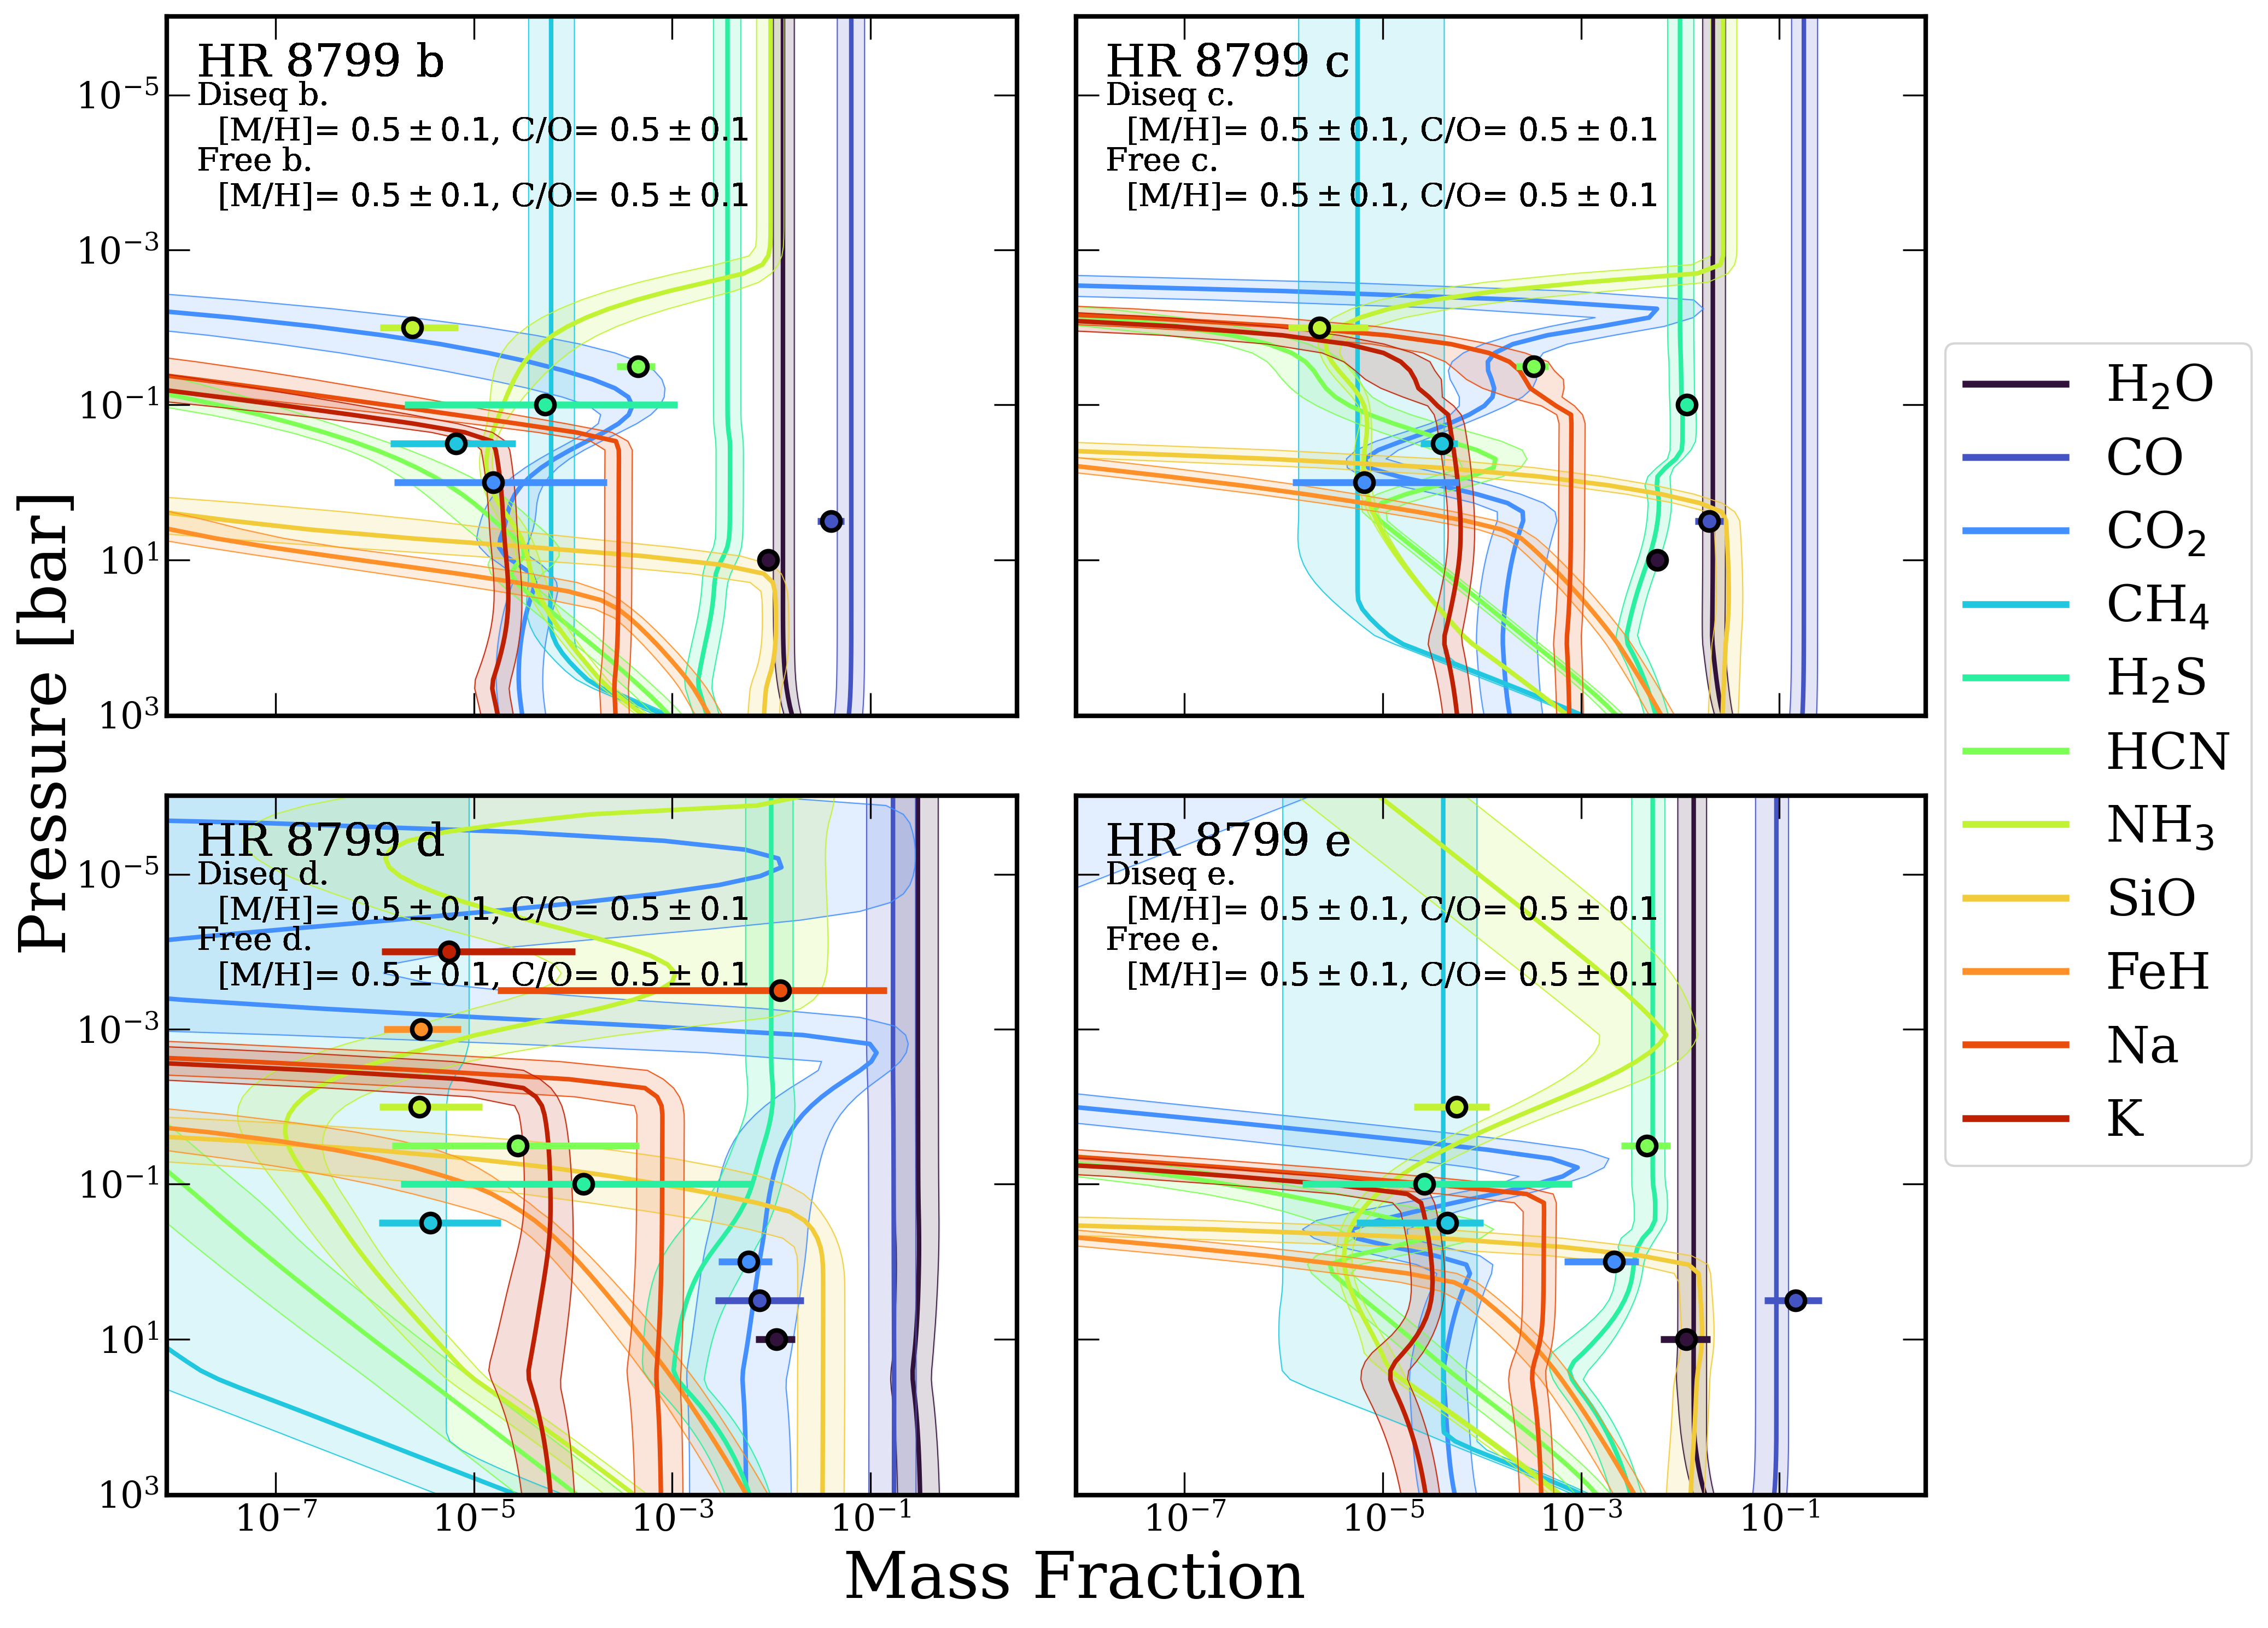

In [7]:
fig, ax = plt.subplots(figsize = (12,10),
                        nrows=2,
                        ncols = 2,
                        sharex=True,
                        sharey=True)
ax = ax.flatten()
species_to_plot = ["H2O_Exomol_R_40",
                   "CO_all_iso_HITEMP_R_40",
                   "CO2_R_40",
                   "CH4_R_40",
                   "H2S_R_40",
                   "HCN_R_40",
                   "NH3_R_40",
                   "SiO_R_40",
                   "FeH_R_40",
                   "Na_allard_R_40",
                   "K_allard_R_40"]
count = 0
qual_map = sc.ScicoMiscellaneous(cmap='turbo')
#qual_map = sc.ScicoMiscellaneous(cmap='rainbow-kov')
#qual_map = sc.ScicoDiverging(cmap='guppy_r')
#qual_map = sc.ScicoSequential(cmap='neon')
cmap = qual_map.get_mpl_color_map()

planets = ["HR 8799 b", "HR 8799 c","HR 8799 d","HR 8799 e"]
for key, value in full_abunds.items():
    # Plot median and 1sigma contours
    for i,species in enumerate(species_to_plot):
        if not species in value.keys():
            continue
        low,med,high = np.quantile(np.array(value[species]),[0.05,0.5,0.95],axis=0)
        ax[count].plot(med,
                pressures,
                label=species.split('_')[0],
                color = cmap(i/len(species_to_plot)),
                zorder = 0,
                linewidth = 2)
        ax[count].plot(low,
            pressures,
            color = cmap(i/len(species_to_plot)),
            linewidth = 0.4,
            zorder = 0)
        ax[count].plot(high,
            pressures,
            color = cmap(i/len(species_to_plot)),
            linewidth = 0.4,
            zorder = 0)

        ax[count].fill_betweenx(pressures,
                        x1 = low,
                        x2 = high,
                        color = cmap(i/len(species_to_plot)),
                        alpha = 0.15,
                        zorder = -1)
        
       
        ax[count].set_yscale('log')
        ax[count].set_xscale('log')
        ax[count].tick_params(axis='both', which='major', labelsize=16)
        ax[count].tick_params(axis='both', which='minor', labelsize=12)

        ax[count].invert_yaxis()
        ax[count].set_xlim(8e-9,3)
        ax[count].set_axisbelow(False)
        ax[count].tick_params(zorder =2)
        ax[count].set_ylim(pressures[-1] * 1.03, pressures[0] / 1.03)
        ax[count].annotate(planets[count], (2*ax[count].get_xlim()[0], 6*ax[count].get_ylim()[1]), fontsize = 20)
        ax[count].annotate(f"Diseq {bulk_parameters[retrievals_full[count]]['index']}\n"rf"  [M/H]= {bulk_parameters[retrievals_full[count]]['M/H']}, C/O= {bulk_parameters[retrievals_full[count]]['C/O']}",
                            (2*ax[count].get_xlim()[0], 40*ax[count].get_ylim()[1]), fontsize = 14)
        ax[count].annotate(f"Free {bulk_parameters[retrievals_free[count]]['index']}\n"rf"  [M/H]= {bulk_parameters[retrievals_free[count]]['M/H']}, C/O= {bulk_parameters[retrievals_free[count]]['C/O']}",
                            (2*ax[count].get_xlim()[0], 280*ax[count].get_ylim()[1]), fontsize = 14)
    count +=1
count =0

offset = 1
for key, value in free_samples.items():
    # Plot median and 1sigma contours
    for i,species in enumerate(species_to_plot):
        if not species.split("_R")[0] in value.columns:
            continue
        low,med,high = np.quantile(10**value[species.split("_R")[0]].to_numpy(),[0.05,0.5,0.95])
        print(species,np.log10(med))
        ax[count].errorbar(med,
                           10**(offset - i/2), 
                           xerr = [[med-low],[high-med]],
                           marker = 'o',
                           markeredgecolor='k',
                           markersize = 8,
                           markeredgewidth=2,
                           elinewidth = 3,
                           color = cmap(i/len(species_to_plot)),
                           zorder = 0,
                           linewidth = 2)
    count +=1



fig.text(0.42,0.0,"Mass Fraction",fontsize=28)
fig.text(0.0,0.4,"Pressure [bar]", rotation=90,fontsize=28)
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=ps.prt_colours[0], lw=3)]
spec_names = [r"H$_{2}$O", "CO", r"CO$_{2}$", "CH$_{4}$", "H$_{2}$S", "HCN", "NH$_{3}$", "SiO", "FeH", "Na", "K"]
custom_lines = []
for i in range(len(spec_names)):
    custom_lines.append(Line2D([0], [0], color = cmap(i/len(species_to_plot)), lw=3))
fig.legend(custom_lines, spec_names, bbox_to_anchor=(11.5/12,0,0.19,0.78),fontsize=22)
plt.savefig("plots/HR8799_allplanet_chemprofiles.pdf",bbox_inches='tight')